<a href="https://colab.research.google.com/github/AilingLiu/Statistics/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[reference](https://app.datacamp.com/learn/courses/introduction-to-regression-in-r)

- Coefficient of determination: R-squared
  - the proportion of the variance in the response variable that is predictable from the explanatory variable: from 0 (worst fit) to 1 (perfect fit) 

- Residual standard error (RSE)
  - a typical differrence between a prediction and an observed response. It has the same unit as the response variable.
  - $RSE=\frac{∑(residuals^2)}{df}$, where df=observations - 2. For example, if RSE of a model (weight (kg) ~ height (cm)) is 10, that means the difference between predicted weight and observed weight value is typically is about 10kg.

- Root-mean-square error (RMSE)
  - $RMSE=\frac{∑(residuals^2)}{N}$, where N=total observations.

In [2]:
pip install rdatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.9 MB 803 kB/s 
  Created wheel for rdatasets: filename=rdatasets-0.1.0-py3-none-any.whl size=19168567 sha256=801c8f76d69acfce961f35f369306f809472d1429e7ee5f8c8b4d0b750692f00
  Stored in directory: /root/.cache/pip/wheels/ef/4e/d6/f967f2312216a7d44046043e44ccb8bc227c7df236fa6e7b11
Successfully built rdatasets


In [3]:
from rdatasets import data
iris = data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
df = data('trees')
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [39]:
df=df.dropna()

In [42]:
import statsmodels.api as sm
sepal_l = sm.add_constant(iris['Sepal.Length'])
results = sm.OLS(iris['Sepal.Width'], sepal_l).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Sepal.Width   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Thu, 07 Jul 2022   Prob (F-statistic):              0.152
Time:                        20:28:01   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.4189      0.254     13.484   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
temp_add = sm.add_constant(df['Girth'])
temp_results = sm.OLS(df['Volume'], temp_add).fit()
print(temp_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           8.64e-19
Time:                        20:37:05   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Visualise Model Fit

- residuals are normallly distributed
- the mean of the residuals is zero

Response vs Fitted Value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


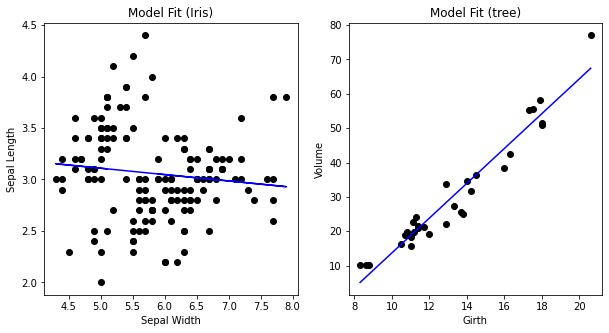

In [77]:
import matplotlib.pyplot as plt

fit, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

x = iris['Sepal.Length']
y_pred = results.predict(sm.add_constant(x))
y_actual = iris['Sepal.Width']

ax1.plot(x, y_pred, color='blue')
ax1.scatter(x, y_actual, color='black')
ax1.set_xlabel('Sepal Width')
ax1.set_ylabel('Sepal Length')
ax1.set_title('Model Fit (Iris)')

v_pred=temp_results.predict(sm.add_constant(df['Girth']))

ax2.plot(df['Girth'], v_pred, color='blue')
ax2.scatter(df['Girth'], df['Volume'], color='black')
ax2.set_xlabel('Girth')
ax2.set_ylabel('Volume')
ax2.set_title('Model Fit (tree)')

fig.tight_layout()

plt.show();

Residuals vs Fitted Value

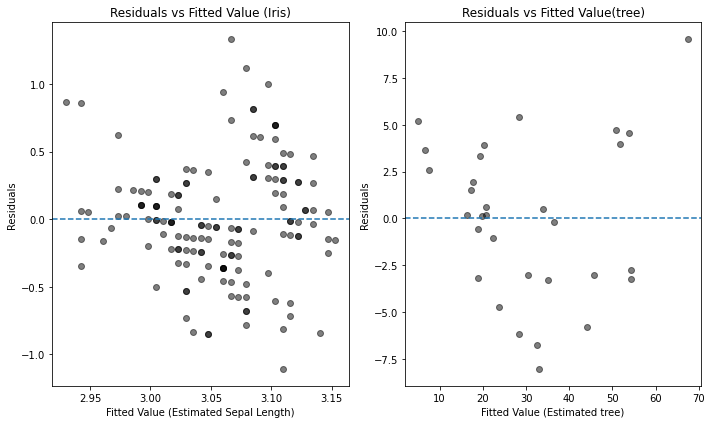

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 6))

residuals = results.resid

ax1.scatter(y_pred, residuals, color='black', alpha=0.5)
ax1.axhline(y=0, linestyle='--')
ax1.set_title('Residuals vs Fitted Value (Iris)')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Fitted Value (Estimated Sepal Length)')

ax2.scatter(v_pred, temp_results.resid, color='black', alpha=0.5)
ax2.axhline(y=0, linestyle='--')
ax2.set_title('Residuals vs Fitted Value(tree)')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Value (Estimated tree)')

fig.tight_layout()

plt.show()

Residuals Q-Q plot

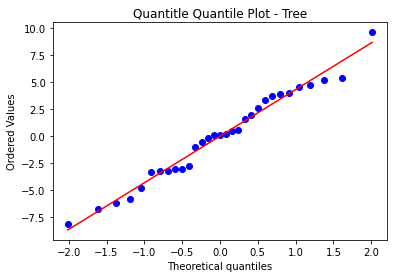

In [109]:
import scipy.stats as stats
import pylab 

stats.probplot(temp_results.resid, dist="norm", plot=pylab)
plt.title('Quantitle Quantile Plot - Tree');

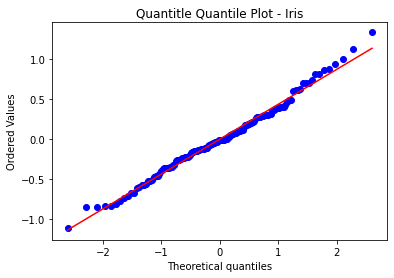

In [110]:
stats.probplot(results.resid, dist="norm", plot=pylab)
plt.title('Quantitle Quantile Plot - Iris');

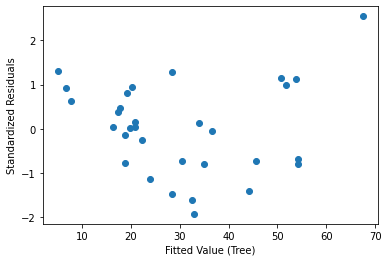

In [114]:
influence_tree = temp_results.get_influence()
std_resid_tree = influence_tree.resid_studentized_internal

plt.scatter(v_pred, std_resid_tree)
plt.ylabel('Standardized Residuals')
plt.xlabel('Fitted Value (Tree)')
plt.show()